 15%|█▌        | 123200/819200 [04:27<33:28, 346.49it/s]


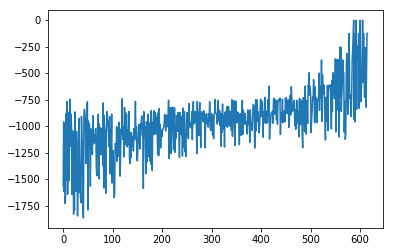

In [2]:
import torch.nn as nn
from seagul.rl.algos.ppo2 import ppo
from seagul.nn import MLP, CategoricalMLP
import torch
import matplotlib.pyplot as plt
from seagul.rl.models import PpoModel
from multiprocessing import Process
#%matplotlib inline

torch.set_default_dtype(torch.double)

input_size = 3
output_size = 1
layer_size = 64
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PpoModel(policy, value_fn, action_var=.1, discrete=False)



# Define our hyper parameters
arg_dict = {
'epoch_batch_size' : 2048,  # how many steps we want to use before we update our gradients
#'env_timesteps' : 199,  # number of steps in an episode (unless we terminate early)
'reward_stop' : -200,
'policy_batch_size' : 512,
'value_batch_size' : 512,
'v_epochs' : 10,
'p_epochs' : 10,
'policy_lr' : 1e-2,
'value_lr' : 1e-2,
'act_var_schedule' : [.707],
}

t_model, rewards, var_dict = ppo("Pendulum-v0", 400*2048, model, seed=0, **arg_dict)

plt.plot(rewards)

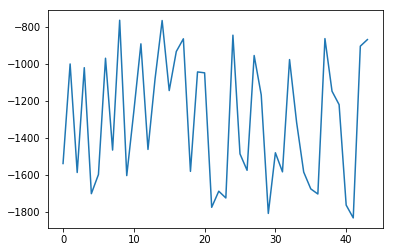

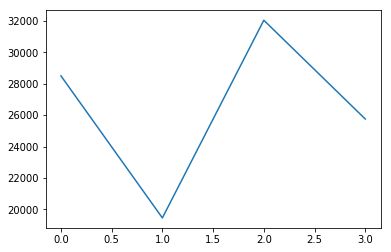

In [8]:
plt.plot(rewards)
plt.figure()
plt.plot(var_dict['value_loss_hist'])

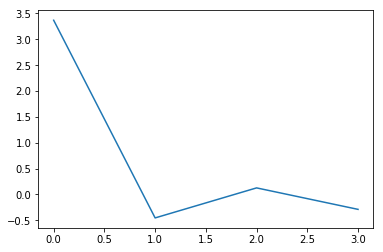

In [9]:
plt.plot(var_dict['policy_loss_hist'])

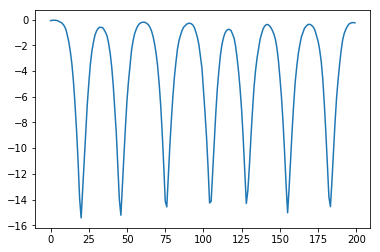

In [10]:
plt.plot(var_dict['ep_rew'].detach().numpy())

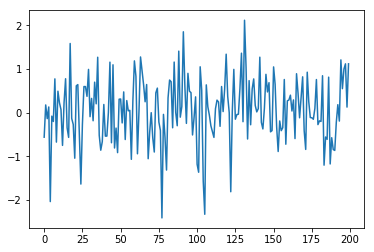

In [5]:
plt.plot(var_dict['ep_act'].detach().numpy())

In [8]:
var_dict['logp']

tensor([-2.8090, -1.7671, -1.8134, -0.7690, -0.5728, -6.5536, -1.9269, -0.5816,
        -0.6079, -0.8529, -2.3080, -0.8079, -0.6980, -0.5943, -0.6450, -1.4901,
        -1.8179, -0.5953, -2.7604, -0.5848, -1.6853, -0.8510, -0.5967, -0.6954,
        -0.6000, -0.8179, -0.6550, -2.1732, -0.8473, -0.9082, -0.6717, -0.8889,
        -0.8557, -0.5763, -0.7058, -1.2898, -0.6292, -1.4444, -1.1122, -0.9382,
        -0.5733, -0.7698, -0.7213, -0.5887, -0.5871, -0.5768, -1.3026, -2.0659,
        -1.0684, -0.9236, -0.7321, -0.6228, -0.8748, -2.4834, -0.5893, -1.5509,
        -1.0313, -1.2781, -1.3308, -0.6799, -0.7896, -0.8123, -0.5729, -0.9030,
        -1.7658, -0.8940, -0.6502, -1.0855, -0.5932, -0.8910, -0.8935, -1.1754,
        -0.7377, -0.5724, -1.2089, -1.3343, -1.5809, -1.8840, -0.8053, -0.6808,
        -0.6807, -0.7713, -1.4499, -4.6630, -1.4307, -1.0293, -0.7595, -0.5737,
        -1.4198, -0.6241, -1.9890, -0.7872, -3.8485, -0.8874, -5.8828, -0.7276,
        -1.2748, -0.9875, -1.1072, -0.61

In [11]:
var_dict

{'v_loss': tensor(25750.6936, grad_fn=<DivBackward0>),
 'value_preds': tensor([[-332.8420],
         [-438.9931],
         [-489.2057],
         [-515.5065],
         [-337.6772],
         [-478.2165],
         [-352.3692],
         [-475.8872],
         [-511.1590],
         [-510.7202],
         [-234.2653],
         [-340.7363],
         [-507.5395],
         [-364.4060],
         [-516.3803],
         [-438.0205],
         [-353.2760],
         [-300.8780],
         [-470.4309],
         [-493.9473],
         [-518.7165],
         [-341.5071],
         [-240.8147],
         [-385.9438],
         [-507.2554],
         [-493.5910],
         [-370.0344],
         [-461.4100],
         [-242.7366],
         [-360.1034],
         [-332.3949],
         [-494.6575],
         [-379.5011],
         [-339.9920],
         [-352.4737],
         [-377.5552],
         [-430.2045],
         [-230.9287],
         [-333.8129],
         [-376.7689],
         [-299.2429],
         [-338.6060],
      